# Jena Climate Dataset
## Examine, Clean and Export

Richard Henry, July 2024

Based on tensorflow documentation:
https://keras.io/examples/timeseries/timeseries_weather_forecasting/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from zipfile import ZipFile

In [2]:
uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = tf.keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "dataset/Jena_climate/jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

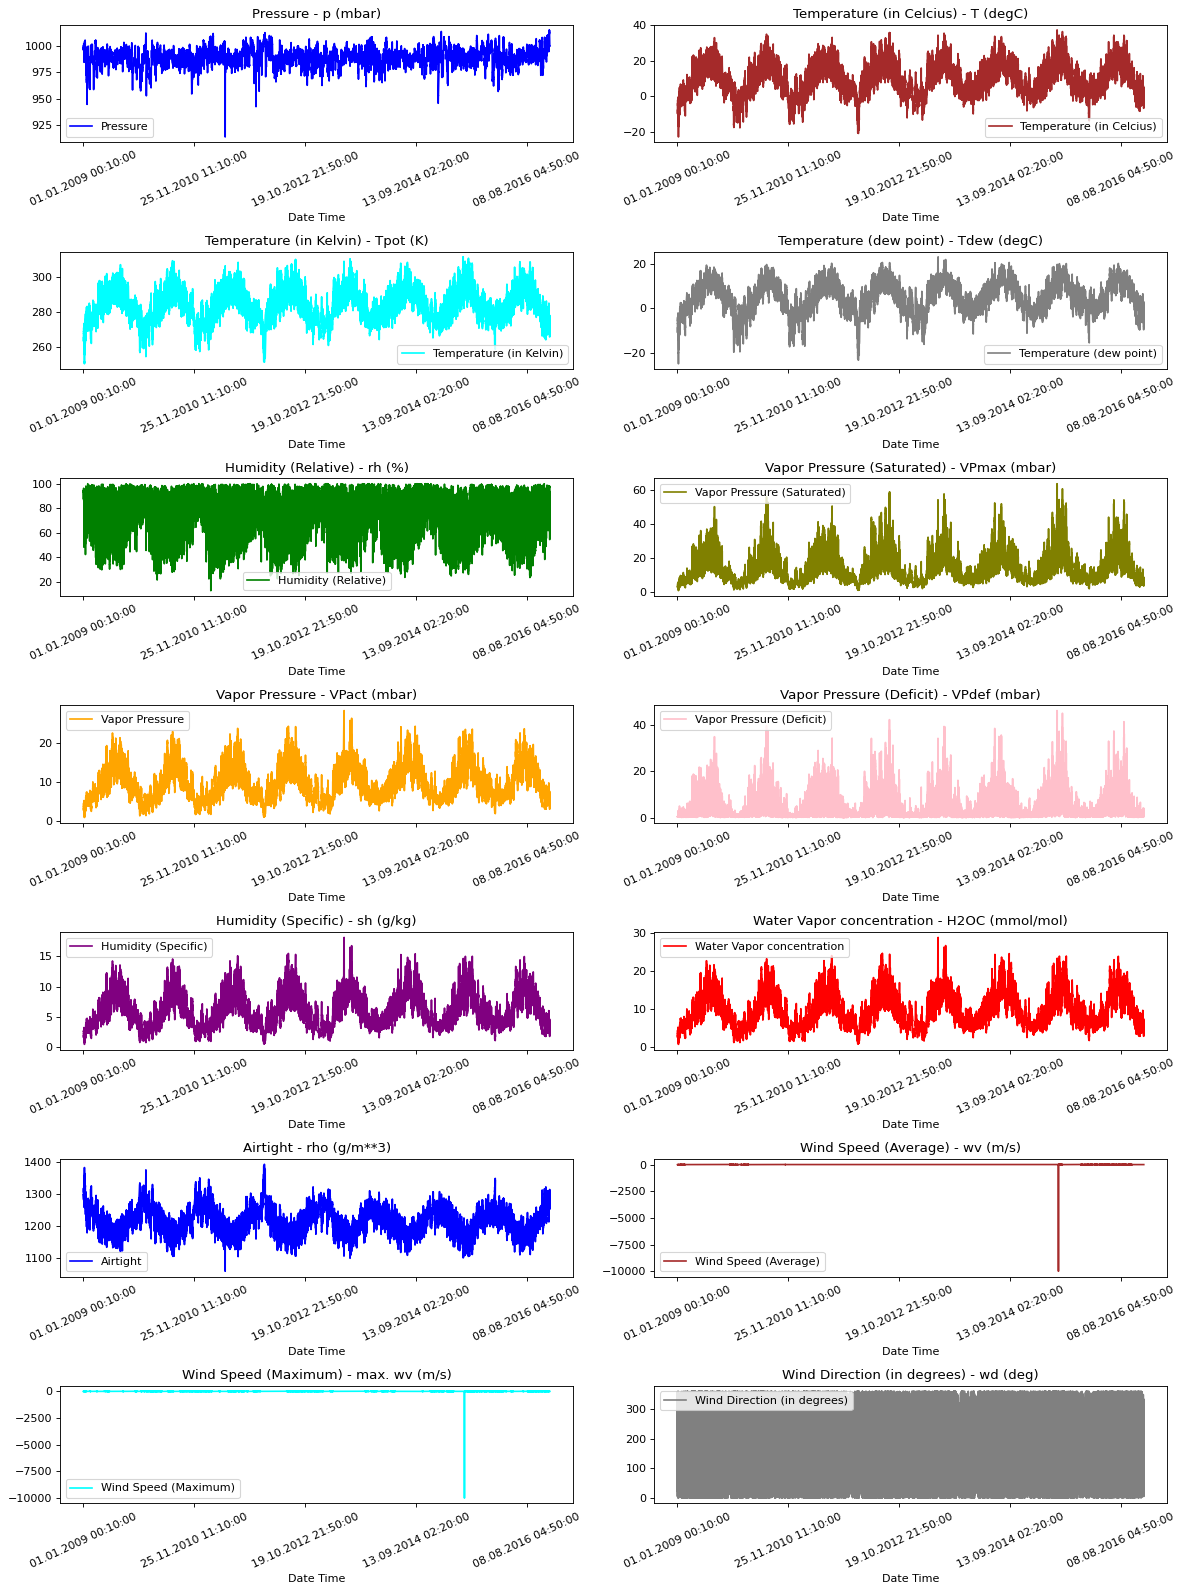

In [3]:
# Very little adjustment!
titles = [
    "Pressure",
    "Temperature (in Celcius)",
    "Temperature (in Kelvin)",
    "Temperature (dew point)",
    "Humidity (Relative)",
    "Vapor Pressure (Saturated)",
    "Vapor Pressure",
    "Vapor Pressure (Deficit)",
    "Humidity (Specific)",
    "Water Vapor concentration",
    "Airtight",
    "Wind Speed (Average)",
    "Wind Speed (Maximum)",
    "Wind Direction (in degrees)",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "brown",
    "cyan",
    "gray",
    "green",
    "olive",
    "orange",
    "pink",
    "purple",
    "red"
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [5]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [6]:
df['Date Time']

0         01.01.2009 00:10:00
1         01.01.2009 00:20:00
2         01.01.2009 00:30:00
3         01.01.2009 00:40:00
4         01.01.2009 00:50:00
                 ...         
420546    31.12.2016 23:20:00
420547    31.12.2016 23:30:00
420548    31.12.2016 23:40:00
420549    31.12.2016 23:50:00
420550    01.01.2017 00:00:00
Name: Date Time, Length: 420551, dtype: object

In [7]:
df['myDT']=pd.to_datetime(df['Date Time'],dayfirst=True)
df['year']=df['myDT'].dt.year
df['month']=df['myDT'].dt.month
df['day']=df['myDT'].dt.day
df['hour']=df['myDT'].dt.hour
df['minute']=df['myDT'].dt.minute

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  object        
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

In [9]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),myDT,year,month,day,hour,minute
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551,420551.000000,420551.000000,420551.000000,420551.00000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738,2012-12-30 06:26:51.498725120,2012.496813,6.517307,15.713324,11.50037,24.999893
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000,2009-01-01 00:10:00,2009.000000,1.000000,1.000000,0.00000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000,2010-12-31 03:25:00,2010.000000,4.000000,8.000000,6.00000,10.000000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000,2012-12-30 06:20:00,2012.000000,7.000000,16.000000,12.00000,20.000000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000,2014-12-29 18:55:00,2014.000000,10.000000,23.000000,17.00000,40.000000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000,2017-01-01 00:00:00,2017.000000,12.000000,31.000000,23.00000,50.000000
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693,NaN,2.289760,3.448322,8.799093,6.92172,17.078234


In [10]:
for i in df.index:
    if df.loc[i,'wv (m/s)']<0:
        df.loc[i,'wv (m/s)']=0
    if df.loc[i,'max. wv (m/s)']<0:
        df.loc[i,'max. wv (m/s)']=0
#   if df.loc[i,'minute'] !=0:
#       df.drop(i, inplace = True)

In [11]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),myDT,year,month,day,hour,minute
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551,420551.000000,420551.000000,420551.000000,420551.00000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,2.130191,3.532074,174.743738,2012-12-30 06:26:51.498725120,2012.496813,6.517307,15.713324,11.50037,24.999893
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,0.000000,0.000000,0.000000,2009-01-01 00:10:00,2009.000000,1.000000,1.000000,0.00000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000,2010-12-31 03:25:00,2010.000000,4.000000,8.000000,6.00000,10.000000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000,2012-12-30 06:20:00,2012.000000,7.000000,16.000000,12.00000,20.000000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000,2014-12-29 18:55:00,2014.000000,10.000000,23.000000,17.00000,40.000000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000,2017-01-01 00:00:00,2017.000000,12.000000,31.000000,23.00000,50.000000
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,1.542334,2.340482,86.681693,NaN,2.289760,3.448322,8.799093,6.92172,17.078234


In [12]:
df['NSwind']=np.cos(df['wd (deg)']*np.pi/180.0)*df['wv (m/s)']
df['EWwind']=np.sin(df['wd (deg)']*np.pi/180.0)*df['wv (m/s)']

In [13]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,max. wv (m/s),wd (deg),myDT,year,month,day,hour,minute,NSwind,EWwind
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,...,420551.000000,420551.000000,420551,420551.000000,420551.000000,420551.000000,420551.00000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,...,3.532074,174.743738,2012-12-30 06:26:51.498725120,2012.496813,6.517307,15.713324,11.50037,24.999893,-0.626802,-0.408377
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,...,0.000000,0.000000,2009-01-01 00:10:00,2009.000000,1.000000,1.000000,0.00000,0.000000,-12.185638,-8.898422
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,...,1.760000,124.900000,2010-12-31 03:25:00,2010.000000,4.000000,8.000000,6.00000,10.000000,-1.471247,-1.371162
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,...,2.960000,198.100000,2012-12-30 06:20:00,2012.000000,7.000000,16.000000,12.00000,20.000000,-0.632737,-0.294725
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,...,4.740000,234.100000,2014-12-29 18:55:00,2014.000000,10.000000,23.000000,17.00000,40.000000,0.307492,0.449802
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,...,23.500000,360.000000,2017-01-01 00:00:00,2017.000000,12.000000,31.000000,23.00000,50.000000,27.064704,7.849152
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,...,2.340482,86.681693,NaN,2.289760,3.448322,8.799093,6.92172,17.078234,1.987296,1.551618


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  object        
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

In [15]:
df1 = df.drop(df[df.minute > 0].index)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70092 entries, 5 to 420550
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date Time        70092 non-null  object        
 1   p (mbar)         70092 non-null  float64       
 2   T (degC)         70092 non-null  float64       
 3   Tpot (K)         70092 non-null  float64       
 4   Tdew (degC)      70092 non-null  float64       
 5   rh (%)           70092 non-null  float64       
 6   VPmax (mbar)     70092 non-null  float64       
 7   VPact (mbar)     70092 non-null  float64       
 8   VPdef (mbar)     70092 non-null  float64       
 9   sh (g/kg)        70092 non-null  float64       
 10  H2OC (mmol/mol)  70092 non-null  float64       
 11  rho (g/m**3)     70092 non-null  float64       
 12  wv (m/s)         70092 non-null  float64       
 13  max. wv (m/s)    70092 non-null  float64       
 14  wd (deg)         70092 non-null  float64  

In [17]:
df2=df1.drop(['Date Time','Tpot (K)','rh (%)','VPmax (mbar)','VPdef (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','wv (m/s)','wd (deg)','myDT','minute'],axis=1)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70092 entries, 5 to 420550
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   p (mbar)       70092 non-null  float64
 1   T (degC)       70092 non-null  float64
 2   Tdew (degC)    70092 non-null  float64
 3   VPact (mbar)   70092 non-null  float64
 4   max. wv (m/s)  70092 non-null  float64
 5   year           70092 non-null  int32  
 6   month          70092 non-null  int32  
 7   day            70092 non-null  int32  
 8   hour           70092 non-null  int32  
 9   NSwind         70092 non-null  float64
 10  EWwind         70092 non-null  float64
dtypes: float64(7), int32(4)
memory usage: 5.3 MB


In [19]:
df2.describe()

,p (mbar),T (degC),Tdew (degC),VPact (mbar),max. wv (m/s),year,month,day,hour,NSwind,EWwind
count,70092.000000,70092.000000,70092.000000,70092.000000,70092.000000,70092.000000,70092.000000,70092.000000,70092.000000,70092.000000,70092.000000
mean,989.213025,9.449504,4.955497,9.533567,3.533703,2012.496975,6.517306,15.713591,11.500499,-0.628432,-0.411247
std,8.358157,8.422546,6.730988,4.184350,2.338343,2.289782,3.448345,8.799172,6.921791,1.985678,1.551204
min,918.500000,-22.760000,-24.800000,0.810000,0.000000,2009.000000,1.000000,1.000000,0.000000,-11.041287,-7.227855
25%,984.200000,3.350000,0.240000,6.210000,1.760000,2010.000000,4.000000,8.000000,6.000000,-1.471652,-1.367127
50%,989.580000,9.420000,5.210000,8.860000,2.960000,2012.000000,7.000000,16.000000,12.000000,-0.634275,-0.301333
75%,994.720000,15.470000,10.070000,12.352500,4.740000,2014.000000,10.000000,23.000000,17.000000,0.302326,0.446375
max,1015.290000,37.280000,22.940000,28.040000,20.330000,2017.000000,12.000000,31.000000,23.000000,8.173613,7.430575


In [20]:
df2

,p (mbar),T (degC),Tdew (degC),VPact (mbar),max. wv (m/s),year,month,day,hour,NSwind,EWwind
5,996.50,-8.05,-8.78,3.14,0.63,2009,1,1,1,-0.204862,-0.046168
11,996.62,-8.88,-9.77,2.90,0.63,2009,1,1,2,-0.245971,-0.044701
17,996.84,-8.81,-9.66,2.93,0.63,2009,1,1,3,-0.175527,0.039879
23,996.99,-9.05,-10.02,2.85,0.38,2009,1,1,4,-0.050000,-0.086603
29,997.46,-9.63,-10.65,2.71,0.88,2009,1,1,5,-0.368202,0.156292
...,...,...,...,...,...,...,...,...,...,...,...
420526,1001.47,-1.52,-7.13,3.57,1.96,2016,12,31,20,-0.763420,-0.977133
420532,1001.29,-3.09,-7.09,3.58,1.48,2016,12,31,21,-0.541077,-0.281667
420538,1000.70,-2.59,-7.04,3.60,0.72,2016,12,31,22,0.376162,0.053871
420544,1000.21,-3.76,-7.95,3.35,1.30,2016,12,31,23,-0.643441,-0.614885


In [21]:
df2.to_csv('dataset/Jena_climate/cleanJena.csv',index=False)

In [22]:
df3=df2.loc[df2['hour'].isin([0,3,6,9,12,15,18,21])]

In [23]:
df3

,p (mbar),T (degC),Tdew (degC),VPact (mbar),max. wv (m/s),year,month,day,hour,NSwind,EWwind
17,996.84,-8.81,-9.66,2.93,0.63,2009,1,1,3,-0.175527,0.039879
35,997.71,-9.67,-10.62,2.71,0.50,2009,1,1,6,-0.041452,0.027960
53,999.69,-7.66,-8.84,3.13,0.63,2009,1,1,9,-0.314796,-0.128466
71,1000.30,-6.87,-8.28,3.27,2.63,2009,1,1,12,-1.834577,-0.141163
89,999.88,-5.69,-7.00,3.61,1.88,2009,1,1,15,-0.825870,0.828758
...,...,...,...,...,...,...,...,...,...,...,...
420478,1004.76,-1.19,-5.90,3.93,1.56,2016,12,31,12,-0.735613,-0.445503
420496,1003.12,5.09,-3.09,4.86,0.70,2016,12,31,15,-0.208774,0.215438
420514,1002.27,-0.08,-4.90,4.24,1.04,2016,12,31,18,-0.295672,-0.254318
420532,1001.29,-3.09,-7.09,3.58,1.48,2016,12,31,21,-0.541077,-0.281667


In [24]:
list(df3)

['p (mbar)',
 'T (degC)',
 'Tdew (degC)',
 'VPact (mbar)',
 'max. wv (m/s)',
 'year',
 'month',
 'day',
 'hour',
 'NSwind',
 'EWwind']

In [25]:
new_order=['p (mbar)','VPact (mbar)','Tdew (degC)','T (degC)','max. wv (m/s)','NSwind','EWwind','year','month','day','hour']

In [26]:
df3=df3[new_order]

In [27]:
df3

,p (mbar),VPact (mbar),Tdew (degC),T (degC),max. wv (m/s),NSwind,EWwind,year,month,day,hour
17,996.84,2.93,-9.66,-8.81,0.63,-0.175527,0.039879,2009,1,1,3
35,997.71,2.71,-10.62,-9.67,0.50,-0.041452,0.027960,2009,1,1,6
53,999.69,3.13,-8.84,-7.66,0.63,-0.314796,-0.128466,2009,1,1,9
71,1000.30,3.27,-8.28,-6.87,2.63,-1.834577,-0.141163,2009,1,1,12
89,999.88,3.61,-7.00,-5.69,1.88,-0.825870,0.828758,2009,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...
420478,1004.76,3.93,-5.90,-1.19,1.56,-0.735613,-0.445503,2016,12,31,12
420496,1003.12,4.86,-3.09,5.09,0.70,-0.208774,0.215438,2016,12,31,15
420514,1002.27,4.24,-4.90,-0.08,1.04,-0.295672,-0.254318,2016,12,31,18
420532,1001.29,3.58,-7.09,-3.09,1.48,-0.541077,-0.281667,2016,12,31,21


In [28]:
df3.to_csv('dataset/Jena_climate/cleanJena3.csv',index=False)

In [29]:
df4=pd.read_csv('dataset/Jena_climate/cleanJena3.csv')

In [30]:
df4

,p (mbar),VPact (mbar),Tdew (degC),T (degC),max. wv (m/s),NSwind,EWwind,year,month,day,hour
0,996.84,2.93,-9.66,-8.81,0.63,-0.175527,0.039879,2009,1,1,3
1,997.71,2.71,-10.62,-9.67,0.50,-0.041452,0.027960,2009,1,1,6
2,999.69,3.13,-8.84,-7.66,0.63,-0.314796,-0.128466,2009,1,1,9
3,1000.30,3.27,-8.28,-6.87,2.63,-1.834577,-0.141163,2009,1,1,12
4,999.88,3.61,-7.00,-5.69,1.88,-0.825870,0.828758,2009,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...
23358,1004.76,3.93,-5.90,-1.19,1.56,-0.735613,-0.445503,2016,12,31,12
23359,1003.12,4.86,-3.09,5.09,0.70,-0.208774,0.215438,2016,12,31,15
23360,1002.27,4.24,-4.90,-0.08,1.04,-0.295672,-0.254318,2016,12,31,18
23361,1001.29,3.58,-7.09,-3.09,1.48,-0.541077,-0.281667,2016,12,31,21
